In [1]:
import numpy as np 
import numpy.typing as npt
import csv
from collections import Counter

from typing import Tuple,List,Set
import matplotlib.pyplot as plt


In [4]:
def load_dataset(filename: str) -> Tuple[List[str], List[str], Set[str]]:
    intent = []
    unique_intent = []
    sentences = []
    with open(filename, "r", encoding="latin1") as f:
        data = csv.reader(f, delimiter=",")
        for row in data:
            sentences.append(row[0])
            intent.append(row[1])
    unique_intent = set(intent)
    return sentences, intent, unique_intent

# sentences, intent, unique_intent = load_dataset("../data/dataset.csv")


In [5]:

def bag_of_words_matrix(sentences: List[str],COUNT_THRESHOLD: int) -> npt.ArrayLike:
    """
    Convert the dataset into V x M matrix.
    """
    token_list = [sentence.strip().split(" ") for sentence in sentences]
    token_list = [token.strip().lower() for token in sum(token_list,[])]

    word_dict = Counter(token_list)
    COUNT_THRESHOLD = 2
    word_dict_t = {"<UNK>":0}

    for word, count in word_dict.items():
        if count <= COUNT_THRESHOLD:
            word_dict_t["<UNK>"] += count
        else:
            word_dict_t[word] = count
            
    vocab = list(word_dict_t.keys())

    word_matrix = np.zeros(shape=(len(sentences),len(vocab)))

    for sent_index,sentence in enumerate(sentences):
        sent = [token if token in vocab else "<UNK>" for token in sentence.strip().split(" ")]
        sent_count_dict = Counter(sent)
        for vocab_index,vocab_word in enumerate(vocab):
            if vocab_word in sent_count_dict.keys():
                word_matrix[sent_index,vocab_index] = sent_count_dict[vocab_word]            
    word_matrix = word_matrix.T
    print(word_matrix.shape)
    
    return word_matrix

def labels_matrix(data: Tuple[List[str], Set[str]]) -> npt.ArrayLike:
    """
    Convert the dataset into K x M matrix.
    """
    intent = data[0]
    intent_vocab = data[1]

    label_matrix = np.zeros(shape=(len(intent),len(intent_vocab)))
    
    for index, label in enumerate(intent):
        for int_index, intent in enumerate(intent_vocab):
            if label == intent:
                label_matrix[index,int_index] = 1
    
    label_matrix = label_matrix.T
    print(label_matrix.shape)
    
    return label_matrix

In [102]:
X = bag_of_words_matrix(sentences=sentences,COUNT_THRESHOLD=2)
# bias = np.ones(shape=X.shape[1]).reshape(1,X.shape[1])
# X = np.append(bias,X,axis=0)
y = labels_matrix(data=(intent,unique_intent))
print(X.shape)

(287, 1000)
(7, 1000)
(287, 1000)


In [132]:
np.random.seed(42)
internal_weights = np.random.uniform(low = -1.0,
                                    high = 1.0,
                                    size = (288,150),
                                    )
output_weights = np.random.uniform(low = -1,
                                        high = 1,
                                        size = (150,7)
                                        )

In [6]:
# weights.T.shape

In [7]:
# z = np.matmul(weights.T,X)

In [8]:
# z.shape

In [9]:
# BATCH_SIZE = 10
# _current = 0 
# for batch_start, batch_stop in zip(np.arange(0,X.shape[1],BATCH_SIZE),np.arange(BATCH_SIZE,X.shape[1],BATCH_SIZE)):
#     # print(batch_start,batch_stop)
#     X_data = X[:,batch_start:batch_stop]
#     # _current = batch
#     # print(X_data.shape)

In [8]:
def relu(z: npt.ArrayLike) -> npt.ArrayLike:
    """
    Rectified Linear Unit function.
    """
    return np.array([np.max([0,i]) for i in z])

def softmax(z: npt.ArrayLike) -> npt.ArrayLike:
    """
    Softmax function.
    """
    assert type(z) == np.ndarray
    return np.exp(z.T) / np.sum(np.exp(z))

def relu_prime(z: npt.ArrayLike) -> npt.ArrayLike:
    """
    First derivative of ReLU function.
    """
    return np.array([1 if i > 0 else 0 for i in z])

# def cross_entropy_loss(y_true, y_pred):
#     """
#     Cross-Entropy Loss
#     """
#     epsilon = 1e-15
#     y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
#     return -np.sum(y_true * np.log(y_pred)) / len(y_true)

In [134]:
# a = np.array([relu(i) for i in z])
# a.shape

In [135]:
# y.shape

In [136]:
# output_weights = np.random.uniform(-1,1,(a.shape[0],y.shape[0]))
# output_weights.shape

In [137]:
# z_out = np.matmul(output_weights.T,a)
# z_out.shape

In [138]:
# a_out = np.array([softmax(node) for node in z_out.T]).T
# a_out.shape

In [200]:
def forward(X: npt.ArrayLike) -> npt.ArrayLike:
    """
    Forward pass with X as input matrix, returning the model prediction
    Y_hat.
    """
    try:
        bias = np.ones(shape=X.shape[1]).reshape(1,X.shape[1])
        X = np.append(bias,X,axis=0)
        # print(f"Shape of Input Matrix : {X.shape}")
        z_internal: npt.ArrayLike = np.matmul(internal_weights.T,X)
        # print(f"Shape of internal weights : {z_internal.shape}")
        a_internal: npt.ArrayLike = np.array([relu(node) for node in z_internal])
        # print(a_internal.shape)
        z_output: npt.ArrayLike = np.matmul(output_weights.T,a_internal)
        # print(f"Shape of output weights : {z_output.shape}")
        a_output: npt.ArrayLike = np.array([softmax(node) for node in z_output.T]).T
        # print(a_output.shape)
        
    except IndexError:
        bias = [1]
        X = np.append(bias,X,axis=0)
        # print(f"Shape of Input Matrix : {X.shape}")
        z_internal: npt.ArrayLike = np.matmul(internal_weights.T,X)
        # print(f"Shape of internal weights : {z_internal.shape}")
        a_internal: npt.ArrayLike = relu(z_internal)
        # print(a_internal.shape)
        z_output: npt.ArrayLike = np.matmul(output_weights.T,a_internal)
        # print(f"Shape of output weights : {z_output.shape}")
        a_output: npt.ArrayLike = softmax(z_output)
        # print(a_output.shape)
    
    return X, z_internal, a_internal, z_output, a_output

In [140]:
# X_w_bias, z_internal, a_internal, z_output, a_output = forward(X)

In [141]:
X_w_bias, z_internal, a_internal, z_output, a_output = forward(X)

Shape of Input Matrix : (288, 1000)
Shape of internal weights : (150, 1000)
Shape of output weights : (7, 1000)


In [142]:
# max_index = np.argmax(a_output,axis=0)
# prediction = np.zeros(shape=a_output.shape)
# for i in range(len(max_index)):
#     prediction[max_index[i],i] = 1

In [143]:
# try:
#     prediction = np.zeros(shape=(a_output.shape[0],a_output.shape[1]))
#     max_index = np.argmax(a_output,axis=0)
#     for i in range(len(max_index)):
#         prediction[max_index[i],i] = 1
# except IndexError:
#     prediction = np.zeros(shape=a_output.shape[0])
#     prediction[a_output.argmax()] = 1
#     prediction

In [201]:
def predict(X: npt.ArrayLike) -> npt.ArrayLike:
        """
        Create a prediction matrix with `self.forward()`
        """
        _, _, _, _, a_output = forward(X)
        
        try:
            prediction = np.zeros(shape=(a_output.shape[0],a_output.shape[1]))
            max_index = np.argmax(a_output,axis=0)
            for i in range(len(max_index)):
                prediction[max_index[i],i] = 1
        except IndexError:
            prediction = np.zeros(shape=a_output.shape[0])
            prediction[a_output.argmax()] = 1
        
        # print(f"Shape of prediction matrix : {prediction.shape}")
        return prediction

In [145]:
predict(X[:,:10])

Shape of Input Matrix : (288, 10)
Shape of internal weights : (150, 10)
Shape of output weights : (7, 10)
Shape of prediction matrix : (7, 10)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [159]:
input_size = 288
hidden_size = 150  # Number of neurons in the hidden layer
output_size = 7  # Number of classes
learning_rate = 0.005

# batch_size = 1000
# cross_entropy_delta = np.subtract(a_output, y)  # Derivative of softmax with cross-entropy loss
# dW2 = np.matmul(a_internal, cross_entropy_delta.T)
# dW2.shape

# output_weights.shape


# dz1 = np.matmul(output_weights,cross_entropy_delta) * np.array([relu_prime(z) for z in z_internal.T]).T
# dW1 = np.dot(X_w_bias,dz1.T) / batch_size

# # Update weights and biases
# output_weights -= learning_rate * dW2
# internal_weights -= learning_rate * dW1



In [147]:
print(np.mean(output_weights))
print(np.mean(internal_weights))

-0.0222381700476624
-0.0008302572176805077


In [250]:
def backward(
        X: npt.ArrayLike, 
        Y: npt.ArrayLike,
        internal_weights,
        output_weights,
        learning_rate,
    ):
        """
        Backpropagation algorithm.
        """
        try:
            batch_size = X.shape[1]
            X_w_bias, z_internal, a_internal, z_output, a_output = forward(X)
            # prediction_matrix = predict(X)
            
            loss = cross_entropy_loss(Y, a_output)
            cross_entropy_delta = np.subtract(a_output, Y)  # Derivative of softmax with cross-entropy loss
            
            grad_output_layer = np.matmul(a_internal.T, cross_entropy_delta) / batch_size
            grad_hidden_input = np.matmul(output_weights,cross_entropy_delta) * np.array([relu_prime(z) for z in z_internal.T]).T
            grad_hidden_layer = np.dot(X_w_bias,grad_hidden_input.T) / batch_size
            
            output_weights -= learning_rate * grad_output_layer
            internal_weights -= learning_rate * grad_hidden_layer
        
        except IndexError:
            X_w_bias, z_internal, a_internal, z_output, a_output = forward(X)
            # prediction_matrix = predict(X)
            
            loss = cross_entropy_loss(Y, a_output)
            cross_entropy_delta = np.subtract(a_output, Y)  # Derivative of softmax with cross-entropy loss
            
            grad_output_layer = np.matmul(a_internal.reshape(hidden_size,1), cross_entropy_delta.reshape(output_size,1).T)
            grad_hidden_input = np.matmul(output_weights,cross_entropy_delta) * relu_prime(z_internal)
            grad_hidden_layer = np.dot(X_w_bias.reshape(input_size,1),grad_hidden_input.reshape(hidden_size,1).T)  
                      
            output_weights -= learning_rate * grad_output_layer
            internal_weights -= learning_rate * grad_hidden_layer
        
        return loss, internal_weights, output_weights 

In [252]:
# np.random.seed(42)
# internal_weights = np.random.uniform(low = -1.0,
#                                     high = 1.0,
#                                     size = (288,150),
#                                     )
# output_weights = np.random.uniform(low = -1,
#                                         high = 1,
#                                         size = (150,7)
#                                         )
# for i in range(1000):
#     loss, internal_weights, output_weights = backward(X[:,i],y[:,i],internal_weights,output_weights,0.005)

In [253]:
# predict(X[:,32:42])

In [254]:
# y[:,32:42]

In [232]:
# internal_weights = np.random.uniform(low = -1.0,
#                                     high = 1.0,
#                                     size = (288,150),
#                                     )
# output_weights = np.random.uniform(low = -1,
#                                         high = 1,
#                                         size = (150,7)
#                                         )
# X_w_bias, z_internal, a_internal, z_output, a_output = forward(X[:,0])
# # prediction_matrix = predict(X)

# loss = cross_entropy_loss(y[:,0], a_output)
# cross_entropy_delta = np.subtract(a_output, y[:,0])  # Derivative of softmax with cross-entropy loss
# dW2 = np.matmul(a_internal.reshape(hidden_size,1), cross_entropy_delta.reshape(output_size,1).T)

# np.matmul(output_weights,cross_entropy_delta) * relu_prime(z_internal)

# dz1 = np.matmul(output_weights,cross_entropy_delta) * relu_prime(z_internal)
# dW1 = np.dot(X_w_bias.reshape(input_size,1),dz1.reshape(hidden_size,1).T)            

In [394]:
class NeuralNetwork(object):
    def __init__(
        self, 
        input_size: int,
        hidden_size: int, 
        num_classes: int,
        random_seed: int = 42,
        learning_rate: float = 0.005,
    ):
        """
        Initialize neural network's weights and biases.
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = num_classes
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        
        np.random.seed(random_seed)
        self.internal_weights = np.random.uniform(low = -1.0,
                                         high = 1.0,
                                         size = (input_size,hidden_size),
                                         )
        self.output_weights = np.random.uniform(low = -1,
                                                high = 1,
                                                size = (hidden_size,num_classes)
                                                )
        
    def forward(self,
                X: npt.ArrayLike
                )-> Tuple[npt.ArrayLike, npt.ArrayLike, npt.ArrayLike, npt.ArrayLike, npt.ArrayLike]:
        """
        Forward pass with X as input matrix, returning the self prediction
        Y_hat.
        """
        try:
            bias = np.ones(shape=X.shape[1]).reshape(1,X.shape[1])
            X = np.append(bias,X,axis=0)
            # print(f"Shape of Input Matrix : {X.shape}")
            z_internal: npt.ArrayLike = np.matmul(self.internal_weights.T,X)
            # print(f"Shape of internal weights : {z_internal.shape}")
            a_internal: npt.ArrayLike = np.array([relu(node) for node in z_internal])
            # print(a_internal.shape)
            z_output: npt.ArrayLike = np.matmul(self.output_weights.T,a_internal)
            # print(f"Shape of output weights : {z_output.shape}")
            a_output: npt.ArrayLike = np.array([softmax(node) for node in z_output.T]).T
            # print(a_output.shape)
            
        except IndexError:
            bias = [1]
            X = np.append(bias,X,axis=0)
            # print(f"Shape of Input Matrix : {X.shape}")
            z_internal: npt.ArrayLike = np.matmul(self.internal_weights.T,X)
            # print(f"Shape of internal weights : {z_internal.shape}")
            a_internal: npt.ArrayLike = relu(z_internal)
            # print(a_internal.shape)
            z_output: npt.ArrayLike = np.matmul(self.output_weights.T,a_internal)
            # print(f"Shape of output weights : {z_output.shape}")
            a_output: npt.ArrayLike = softmax(z_output.reshape(z_output.shape[0],1))
            # print(a_output.shape)
        
        return X, z_internal, a_internal, z_output, a_output

    def predict(self, X: npt.ArrayLike) -> npt.ArrayLike:
        """
        Create a prediction matrix with `self.forward()`
        """
        try:
            prediction = []
            for i in range(X.shape[1]):
                _, _, _, _, a_output = self.forward(X[:,i])
                prediction_int = np.zeros(shape=a_output.shape[1])
                prediction_int[a_output.argmax()] = 1
                prediction.append(list(prediction_int))
            prediction = np.array(prediction).T
        except IndexError:
            _, _, _, _, a_output = self.forward(X)
            prediction = np.zeros(shape=a_output.shape[0])
            prediction[a_output.argmax()] = 1
        
        # print(prediction.shape)
        return prediction

    def backward(
        self, 
        X: npt.ArrayLike, 
        Y: npt.ArrayLike
    ) -> Tuple[npt.ArrayLike, npt.ArrayLike, npt.ArrayLike, npt.ArrayLike]:
        """
        Backpropagation algorithm.
        """
        try:
            batch_size = X.shape[1]
            X_bias, z_internal, a_internal, _, a_output = self.forward(X)

            cross_entropy_delta = np.subtract(a_output, Y)  # Derivative of softmax with cross-entropy loss
            grad_output_layer = np.matmul(a_internal.T, cross_entropy_delta) / batch_size
            grad_hidden_input = np.matmul(self.output_weights,cross_entropy_delta) * np.array([relu_prime(z) for z in z_internal.T]).T
            grad_hidden_layer = np.dot(X_bias,grad_hidden_input.T) / batch_size
        
        except IndexError:
            X_bias, z_internal, a_internal, _, a_output = self.forward(X)
            Y = Y.reshape(self.output_size,1)
            z_internal = z_internal.reshape(self.hidden_size,1)
            a_internal = a_internal.reshape(self.hidden_size,1)
            
            cross_entropy_delta = np.subtract(a_output, Y)  # Derivative of softmax with cross-entropy loss
            grad_output_layer = np.matmul(a_internal, cross_entropy_delta.T)
            grad_hidden_input = np.matmul(self.output_weights,cross_entropy_delta) * relu_prime(z_internal).reshape(self.hidden_size,1)
            grad_hidden_layer = np.dot(X_bias.reshape(self.input_size,1),grad_hidden_input.reshape(self.hidden_size,1).T)  
            
        return grad_hidden_layer, grad_output_layer
    
    def batch_train(self, X, Y, train_flag=False):
        prediction = self.predict(X)
        hits = np.sum([np.array_equal(prediction[:,i],Y[:,i]) for i in range(X.shape[1])])
        print(f"Accuracy of self : {hits*100/X.shape[1]} %")
        
        if train_flag:
            loss_list = []
            accuracy_list =[]
            for i in range(X.shape[1]):
                grad_hidden_layer, grad_output_layer = self.backward(X[:,i],Y[:,i])
                self.internal_weights -= self.learning_rate * grad_hidden_layer
                self.output_weights -= self.learning_rate * grad_output_layer
                # prediction = self.predict(X)
                # loss_list.append(compute_loss(prediction,Y))
                if i%25 == 0:
                    print(f"Inputs processed : {i}")
                    prediction = self.predict(X)
                    hits = np.sum([np.array_equal(prediction[:,i],Y[:,i]) for i in range(X.shape[1])])
                    loss_list.append(compute_loss(prediction,Y))
                    accuracy_list.append(hits*100/1000)
                    print(f"Current loss : {compute_loss(prediction,Y)} \nCurrent Accuracy : {hits*100/X.shape[1]} %")
                        
            prediction = self.predict(X)
            hits = np.sum([np.array_equal(prediction[:,i],Y[:,i]) for i in range(X.shape[1])])
            print(f"Accuracy of self : {hits*100/X.shape[1]} %")
            
            plt.style.use("seaborn")
            fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10),sharex=True)
            ax[0].plot(range(1,X.shape[1]+1,25),loss_list,"k-",linewidth=2)
            ax[1].plot(range(1,X.shape[1]+1,25),accuracy_list,"r-",linewidth=2)
            plt.xlabel("Iteration",fontdict={"size":14,"weight":"bold"})
            ax[0].set_ylabel("Cost Function",fontdict={"size":14,"weight":"bold"})
            ax[1].set_ylabel("Accuracy",fontdict={"size":14,"weight":"bold"})
            plt.xticks(range(X.shape[1]+1)[::100])
            fig.tight_layout()
            fig.savefig("./images/Cost_Function_Training.jpeg",dpi=300)
            print("Image saved at : ./images/Cost_Function_Training.jpeg")


def compute_loss(pred: npt.ArrayLike, truth: npt.ArrayLike) -> float:
    """
    Compute the cross entropy loss.
    """
    epsilon = 1e-15
    y_pred = np.clip(pred, epsilon, 1 - epsilon)
    
    return -np.mean(np.sum(truth * np.log(y_pred),axis=0)) / len(truth)

In [395]:
model = NeuralNetwork(input_size=X.shape[0]+1,
                          hidden_size=150,
                          num_classes=y.shape[0])

In [396]:
prediction = model.predict(X)
hits = np.sum([np.array_equal(prediction[:,i],y[:,i]) for i in range(1000)])
print(f"Accuracy of model : {hits*100/1000} %")

Accuracy of model : 18.2 %


In [391]:
loss_list = []
accuracy_list = []
for i in range(X.shape[1]):
    grad_hidden_layer, grad_output_layer = model.backward(X[:,i],y[:,i])
    model.internal_weights -= model.learning_rate * grad_hidden_layer
    model.output_weights -= model.learning_rate * grad_output_layer
    # prediction = model.predict(X)
    # loss_list.append(compute_loss(prediction,y))
    if i%25 == 0:
        print(f"Inputs processed : {i}")
        prediction = model.predict(X)
        hits = np.sum([np.array_equal(prediction[:,i],y[:,i]) for i in range(1000)])
        loss_list.append(compute_loss(prediction,y))
        accuracy_list.append(hits*100/1000)
        print(f"Current loss : {compute_loss(prediction,y)} \nCurrent Accuracy : {hits*100/1000} %")

Inputs processed : 0
Current loss : 4.07557561459946 Current Accuracy : 17.4 %
Inputs processed : 25
Current loss : 4.055839170945225 Current Accuracy : 17.8 %
Inputs processed : 50
Current loss : 3.6759126306012075 Current Accuracy : 25.5 %
Inputs processed : 75
Current loss : 3.8683429562299954 Current Accuracy : 21.6 %
Inputs processed : 100
Current loss : 3.4933505267995373 Current Accuracy : 29.2 %
Inputs processed : 125
Current loss : 3.547625746848682 Current Accuracy : 28.1 %
Inputs processed : 150
Current loss : 3.172633317418224 Current Accuracy : 35.7 %
Inputs processed : 175
Current loss : 3.167699206504665 Current Accuracy : 35.8 %
Inputs processed : 200
Current loss : 3.1874356501589 Current Accuracy : 35.4 %
Inputs processed : 225
Current loss : 2.7482997788521786 Current Accuracy : 44.3 %
Inputs processed : 250
Current loss : 2.6249470060132123 Current Accuracy : 46.8 %
Inputs processed : 275
Current loss : 2.565737675050508 Current Accuracy : 48.0 %
Inputs processed : 

In [392]:
import matplotlib.pyplot as plt

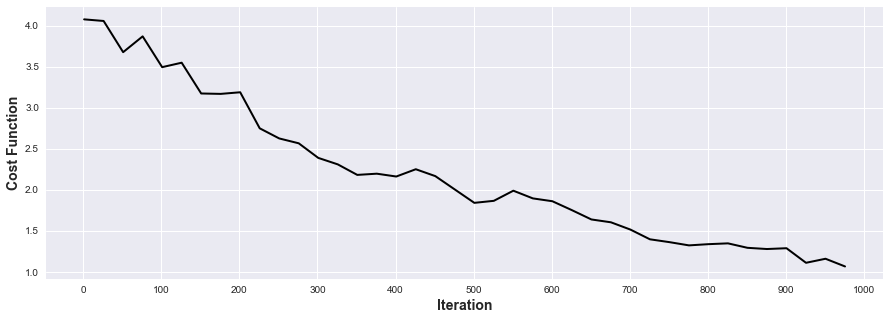

In [393]:
plt.style.use("seaborn")
plt.figure(figsize=(15,5))
plt.plot(range(1,X.shape[1]+1,25),loss_list,"k-",linewidth=2);
plt.xlabel("Iteration",fontdict={"size":14,"weight":"bold"});
plt.ylabel("Cost Function",fontdict={"size":14,"weight":"bold"});
plt.xticks(range(X.shape[1]+1)[::100]);

In [339]:
# prediction = model.predict(X)
# prediction.shape

In [340]:
# acc = 0
# for i in range(1000):
#     if np.array_equal(prediction[:,i],y[:,i]):
#         acc += 1
# acc/1000

In [341]:
# compute_loss(prediction,y)

In [342]:
# final_pred = []

# for i in range(X.shape[1]):
#     _, _, _, _, a_output = forward(X[:,i])
#     prediction = np.zeros(shape=a_output.shape[0])
#     prediction[a_output.argmax()] = 1
#     final_pred.append(list(prediction))

In [343]:
# prediction

In [344]:
# np.array(final_pred).T[:,0]

In [345]:
def batch_train(X, Y, model, train_flag=False):
    prediction = model.predict(X)
    acc = 0
    for i in range(1000):
        if np.array_equal(prediction[:,i],Y[:,i]):
            acc += 1
    print(f"Accuracy of model : {acc*100/1000} %")
    
    if train_flag:
        loss_list = []
        for i in range(X.shape[1]):
            grad_hidden_layer, grad_output_layer = model.backward(X[:,i],Y[:,i])
            model.internal_weights -= model.learning_rate * grad_hidden_layer
            model.output_weights -= model.learning_rate * grad_output_layer
            prediction = model.predict(X)
            loss_list.append(compute_loss(prediction,Y))
            if i%25 == 0:
                print(f"Inputs processed : {i}")
            
        prediction = model.predict(X)
        acc = 0
        for i in range(1000):
            if np.array_equal(prediction[:,i],Y[:,i]):
                acc += 1
        print(f"Accuracy of model : {acc*100/1000} %")
        
        plt.style.use("seaborn")
        plt.figure(figsize=(15,5))
        plt.plot(range(1,X.shape[1]+1),loss_list,"k-",linewidth=2);
        plt.xlabel("Iteration",fontdict={"size":14,"weight":"bold"});
        plt.ylabel("Cost Function",fontdict={"size":14,"weight":"bold"});
        plt.xticks(range(X.shape[1]+1)[::100]);
        plt.savefig("./images/Cost_Function_Training.jpeg",dpi=300)
        print("Image saved at : ./images/Cost_Function_Training.jpeg")

In [346]:
model = NeuralNetwork(input_size=X.shape[0]+1,
                          hidden_size=150,
                          num_classes=y.shape[0])

In [347]:
batch_train(X, y, model, train_flag=False)

Accuracy of model : 18.2 %


In [348]:
grad_hidd_layer, grad_out_layer = model.backward(X[:,0],y[:,0])

In [350]:
grad_out_layer.shape

(150, 7)

In [351]:
X_bias, z_internal, a_internal, _, a_output = model.forward(X[:,0])

In [354]:
a_output.shape

(7,)

In [355]:
cross_entropy_delta = np.subtract(a_output, y[:,0])
cross_entropy_delta.shape

(7,)

In [168]:
from typing import Tuple
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

def softmax(z: npt.ArrayLike) -> npt.ArrayLike:
    """
    Softmax function.
    """
    return np.divide(np.exp(z),np.sum(np.exp(z),axis=0))

def relu(z: npt.ArrayLike) -> npt.ArrayLike:
    """
    Rectified Linear Unit function.
    """
    return np.array([np.max([0,i]) for i in z])

# def softmax2(z: npt.ArrayLike) -> npt.ArrayLike:
#     """
#     Softmax function.
#     """
#     return np.exp(z.T) / np.sum(np.exp(z))

def relu_prime(z: npt.ArrayLike) -> npt.ArrayLike:
    """
    First derivative of ReLU function.
    """
    return np.array([1 if i > 0 else 0 for i in z])


# from typing import Tuple
# import numpy as np
# import numpy.typing as npt
# import matplotlib.pyplot as plt

# from model.model_utils import softmax, relu, relu_prime


def compute_loss(pred: npt.ArrayLike, truth: npt.ArrayLike) -> float:
    """
    Compute the cross entropy loss.
    """
    epsilon = 1e-15
    y_pred = np.clip(pred, epsilon, 1 - epsilon)
    
    return -np.mean(np.sum(truth * np.log(y_pred),axis=0)) / len(truth)


class NeuralNetwork(object):
    def __init__(
        self, 
        input_size: int,
        hidden_size: int, 
        num_classes: int,
        random_seed: int = 1,
        learning_rate: float = 0.005,
    ):
        """
        Initialize neural network's weights and biases.
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = num_classes
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        
        np.random.seed(random_seed)
        self.internal_weights = np.random.uniform(low = -1.0,
                                         high = 1.0,
                                         size = (input_size,hidden_size),
                                         )
        np.random.seed(random_seed)
        self.output_weights = np.random.uniform(low = -1,
                                                high = 1,
                                                size = (hidden_size,num_classes)
                                                )
        print("------------------Model Initialised------------------")
        
    def forward(self,
                X: npt.ArrayLike
                )-> Tuple[npt.ArrayLike, npt.ArrayLike, npt.ArrayLike, npt.ArrayLike, npt.ArrayLike]:
        """
        Forward pass with X as input matrix, returning the self prediction
        Y_hat.
        """
        try:
            bias = np.ones(shape=X.shape[1]).reshape(1,X.shape[1])
            X = np.append(bias,X,axis=0)
            # print(f"Shape of Input Matrix : {X.shape}")
            z_internal: npt.ArrayLike = np.matmul(self.internal_weights.T,X)
            # print(f"Shape of internal weights : {z_internal.shape}")
            a_internal: npt.ArrayLike = np.array([relu(node) for node in z_internal])
            # print(a_internal.shape)
            z_output: npt.ArrayLike = np.matmul(self.output_weights.T,a_internal)
            print(f"Shape of output weights : {z_output.shape}")
            a_output: npt.ArrayLike = softmax(z_output)
            # print(a_output.shape)
            
        except IndexError:
            bias = [1]
            X = np.append(bias,X,axis=0)
            # print(f"Shape of Input Matrix : {X.shape}")
            z_internal: npt.ArrayLike = np.matmul(self.internal_weights.T,X)
            # print(f"Shape of internal weights : {z_internal.shape}")
            a_internal: npt.ArrayLike = relu(z_internal)
            # print(a_internal.shape)
            z_output: npt.ArrayLike = np.matmul(self.output_weights.T,a_internal)
            # print(f"Shape of output weights : {z_output.shape}")
            a_output: npt.ArrayLike = softmax(z_output)
            a_output = a_output.reshape(self.output_size,1)
            # print(a_output.shape)
        
        return X, z_internal, a_internal, z_output, a_output

    def predict(self, X: npt.ArrayLike) -> npt.ArrayLike:
        """
        Create a prediction matrix with `self.forward()`
        """
        try:
            prediction = []
            for i in range(X.shape[1]):
                _, _, _, _, a_output = self.forward(X[:,i])
                prediction_int = np.zeros(shape=self.output_size)
                prediction_int[a_output.argmax()] = 1
                prediction.append(list(prediction_int))
            prediction = np.array(prediction).T
        except IndexError:
            _, _, _, _, a_output = self.forward(X)
            prediction = np.zeros(shape=(self.output_size,1))
            prediction[a_output.argmax()] = 1
        
        # print(prediction.shape)
        return prediction

    def backward(
        self, 
        X: npt.ArrayLike, 
        Y: npt.ArrayLike
    ) -> Tuple[npt.ArrayLike, npt.ArrayLike]:
        """
        Backpropagation algorithm.
        """
        try:
            batch_size = X.shape[1]
            X_bias, z_internal, a_internal, _, a_output = self.forward(X)
            
            loss = compute_loss(a_output,Y)

            cross_entropy_delta = np.subtract(a_output, Y)  # Derivative of softmax with cross-entropy loss
            grad_output_layer = np.matmul(a_internal, cross_entropy_delta.T)
            grad_hidden_input = np.matmul(self.output_weights,cross_entropy_delta) * np.array([relu_prime(z) for z in z_internal.T]).T
            grad_hidden_layer = np.dot(X_bias,grad_hidden_input.T)
        
        except IndexError:
            X_bias, z_internal, a_internal, _, a_output = self.forward(X)
            Y = Y.reshape(self.output_size,1)
            z_internal = z_internal.reshape(self.hidden_size,1)
            a_internal = a_internal.reshape(self.hidden_size,1)
            a_output = a_output.reshape(Y.shape)
            # print(X_bias.shape)
            # print(Y.shape)
            # print(z_internal.shape)
            # print(a_internal.shape)
            # print(a_output.shape)
            
            loss = compute_loss(a_output,Y)
            
            cross_entropy_delta = np.subtract(a_output, Y)  # Derivative of softmax with cross-entropy loss
            grad_output_layer = np.matmul(a_internal, cross_entropy_delta.T)
            grad_hidden_input = np.matmul(self.output_weights,cross_entropy_delta) * relu_prime(z_internal).reshape(self.hidden_size,1)
            grad_hidden_layer = np.dot(X_bias.reshape(self.input_size,1),grad_hidden_input.reshape(self.hidden_size,1).T)  
            
        return loss, grad_hidden_layer, grad_output_layer



In [169]:
sentences, intent, unique_intent = load_dataset("../data/dataset.csv")

X = bag_of_words_matrix(sentences=sentences,COUNT_THRESHOLD=2)
Y = labels_matrix(data=(intent,unique_intent))
print(f"Input Matrix Shape: {X.shape}")
print(f"Target Matrix Shape: {Y.shape}")

model = NeuralNetwork(input_size=X.shape[0]+1,
                        hidden_size=150,
                        num_classes=Y.shape[0])

(287, 1000)
(7, 1000)
Input Matrix Shape: (287, 1000)
Target Matrix Shape: (7, 1000)
------------------Model Initialised------------------


In [170]:
# BATCH_SIZE = 64
# START_INDEX = 0
# NUM_EXAMPLES = 1000

# i = 0
# while i < NUM_EXAMPLES:
#     print(X[:,i:i+BATCH_SIZE].shape)
#     i += BATCH_SIZE
        

In [171]:
def batch_train(X, Y, model, train_flag=False):
    NUM_EXAMPLES = X.shape[1]
    prediction = model.predict(X)
    hits = np.sum([np.array_equal(prediction[:,i],Y[:,i]) for i in range(X.shape[1])])
    print(f"Accuracy of model : {hits*100/X.shape[1]} %")
    
    if train_flag:
        loss_list = []
        accuracy_list = []
        for i in range(NUM_EXAMPLES):
            loss, grad_hidden_layer, grad_output_layer = model.backward(X[:,i],Y[:,i])
            model.internal_weights -= model.learning_rate * grad_hidden_layer
            model.output_weights -= model.learning_rate * grad_output_layer
            # loss_list.append(loss)
            if i%25 == 0:
                print(f"Inputs processed : {i}")
                prediction = model.predict(X)
                hits = np.sum([np.array_equal(prediction[:,i],Y[:,i]) for i in range(NUM_EXAMPLES)])
                loss_list.append(compute_loss(prediction,Y))
                accuracy_list.append(hits*100/1000)
                print(f"Current loss : {compute_loss(prediction,Y)} \tCurrent Accuracy : {hits*100/NUM_EXAMPLES} %")
                print(f"Batch loss : {loss}")
        prediction = model.predict(X)
        hits = np.sum([np.array_equal(prediction[:,i],Y[:,i]) for i in range(NUM_EXAMPLES)])
        print(f"Accuracy of model : {hits*100/NUM_EXAMPLES} %")
        
def minibatch_train(X, Y, model, BATCH_SIZE:int = 64, train_flag=False):
    NUM_EXAMPLES = X.shape[1]
    prediction = model.predict(X)
    hits = np.sum([np.array_equal(prediction[:,i],Y[:,i]) for i in range(NUM_EXAMPLES)])
    print(f"Accuracy of model : {hits*100/NUM_EXAMPLES} %")
    
    if train_flag:
        loss_list = []
        accuracy_list = []
        
        i = 0
        while i < NUM_EXAMPLES:
            loss, grad_hidden_layer, grad_output_layer = model.backward(X[:,i:i+BATCH_SIZE],Y[:,i:i+BATCH_SIZE])
            model.internal_weights -= model.learning_rate * grad_hidden_layer
            model.output_weights -= model.learning_rate * grad_output_layer
            print(f"loss : {loss}")
            print(f"Inputs processed : {i}")
            prediction = model.predict(X)
            hits = np.sum([np.array_equal(prediction[:,i],Y[:,i]) for i in range(NUM_EXAMPLES)])
            loss_list.append(compute_loss(prediction,Y))
            accuracy_list.append(hits*100/1000)
            print(f"Current loss : {compute_loss(prediction,Y)} \tCurrent Accuracy : {hits*100/NUM_EXAMPLES} %")
            i += BATCH_SIZE
            
    return loss_list

In [172]:
# batch_train(X,Y,model,train_flag=True)

In [173]:
ll = minibatch_train(X,Y,model,BATCH_SIZE=64,train_flag=True)

Accuracy of model : 19.4 %
Shape of output weights : (7, 64)
loss : 1.5774910176822172
Inputs processed : 0
Current loss : 3.8880793998842305 	Current Accuracy : 21.2 %
Shape of output weights : (7, 64)
loss : 1.7857261336524135
Inputs processed : 64
Current loss : 4.006498061809638 	Current Accuracy : 18.8 %
Shape of output weights : (7, 64)
loss : 1.694996705298218
Inputs processed : 128
Current loss : 3.157830984677548 	Current Accuracy : 36.0 %
Shape of output weights : (7, 64)
loss : 1.2432124832765565
Inputs processed : 192
Current loss : 3.281183757516515 	Current Accuracy : 33.5 %
Shape of output weights : (7, 64)
loss : 1.0364961754603839
Inputs processed : 256
Current loss : 3.2811837575165135 	Current Accuracy : 33.5 %
Shape of output weights : (7, 64)
loss : 0.9040346063285349
Inputs processed : 320
Current loss : 2.4966601222606863 	Current Accuracy : 49.4 %
Shape of output weights : (7, 64)
loss : 0.8408179282835656
Inputs processed : 384
Current loss : 2.323966240286133 

In [175]:
len(ll)

16

In [176]:
1000 // 64

15

In [178]:
len(range(1,1000+1,64))

16